In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\fergu\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Import and Initial Data Cleaning

In [3]:
german = pd.read_csv('C:\\Users\\fergu\\german.csv')

In [4]:
german = pd.DataFrame(german)

In [5]:
german.head()

,Unnamed: 0,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,...,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
0,497,1,3,6,2,3,2108,1,3,2,...,2,1,29,2,1,1,1,1,1,1
1,756,0,1,15,1,4,950,1,4,4,...,3,3,33,2,1,2,1,2,1,1
2,580,0,1,42,2,3,7174,4,3,4,...,3,3,30,2,2,1,1,1,2,1
3,833,0,3,36,3,4,7980,4,1,4,...,4,3,27,2,1,2,1,1,2,1
4,602,1,3,24,3,2,2028,1,3,2,...,2,2,30,2,2,2,1,1,1,1


In [6]:
cols = ['Unnamed: 0', 'lend', 'bal', 'cred_duration', 'pmt_status', 'purpose', 'cred_amt', 'value_svngs', 'empl_length', 'instal_pc',
        'mar_status', 'guarantors', 'addr_duration', 'most_val_asset', 'age_yrs', 'concurr_cred', 'residence',
        'cred_this_bnk', 'occup', 'dependents', 'phone', 'foreign']

In [7]:
german.columns = cols

In [8]:
german.head()

,Unnamed: 0,lend,bal,cred_duration,pmt_status,purpose,cred_amt,value_svngs,empl_length,instal_pc,...,addr_duration,most_val_asset,age_yrs,concurr_cred,residence,cred_this_bnk,occup,dependents,phone,foreign
0,497,1,3,6,2,3,2108,1,3,2,...,2,1,29,2,1,1,1,1,1,1
1,756,0,1,15,1,4,950,1,4,4,...,3,3,33,2,1,2,1,2,1,1
2,580,0,1,42,2,3,7174,4,3,4,...,3,3,30,2,2,1,1,1,2,1
3,833,0,3,36,3,4,7980,4,1,4,...,4,3,27,2,1,2,1,1,2,1
4,602,1,3,24,3,2,2028,1,3,2,...,2,2,30,2,2,2,1,1,1,1


In [9]:
german.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
len(german)

500

### Scale the Variables - Either Standardize (Mean/ SD) or Normalize (0-1 Scale)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
#scaler = StandardScaler()
#german3 = scaler.fit_transform(german)
#german3

In [14]:
scaler = MinMaxScaler()
german3 = scaler.fit_transform(german)
german3

array([[ 1.        ,  1.        ,  0.03571429, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.19642857, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.67857143, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [ 1.        ,  1.        ,  0.25      , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.5       ,  0.35714286, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  0.67857143, ...,  0.        ,
         1.        ,  0.        ]])

In [15]:
# Was advised to normalize data. But could not get the logistic regression model to work on the normalized or standardized data. 

cols = ['lend', 'bal', 'cred_duration', 'pmt_status', 'purpose', 'cred_amt', 'value_svngs', 'empl_length', 'instal_pc',
        'mar_status', 'guarantors', 'addr_duration', 'most_val_asset', 'age_yrs', 'concurr_cred', 'residence',
        'cred_this_bnk', 'occup', 'dependents', 'phone', 'foreign']
german3 = pd.DataFrame(german3, columns=cols)
german3['lend'] = german['lend']
german3.head()

,lend,bal,cred_duration,pmt_status,purpose,cred_amt,value_svngs,empl_length,instal_pc,mar_status,...,addr_duration,most_val_asset,age_yrs,concurr_cred,residence,cred_this_bnk,occup,dependents,phone,foreign
0,1,1.0,0.035714,0.5,0.666667,0.100948,0.0,0.666667,0.333333,1.0,...,0.333333,0.000000,0.178571,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.196429,0.0,1.000000,0.037139,0.0,1.000000,1.000000,0.5,...,0.666667,0.666667,0.250000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,0.0,0.678571,0.5,0.666667,0.380097,1.0,0.666667,1.000000,0.0,...,0.666667,0.666667,0.196429,1.0,0.5,0.0,0.0,0.0,1.0,0.0
3,0,1.0,0.571429,1.0,1.000000,0.424510,1.0,0.000000,1.000000,0.5,...,1.000000,0.666667,0.142857,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,1.0,0.357143,1.0,0.333333,0.096540,0.0,0.666667,0.333333,0.5,...,0.333333,0.333333,0.196429,1.0,0.5,1.0,0.0,0.0,0.0,0.0


### Standard Logistic Regression, Ridge Regression and LASSO Regression Models

Below we define and calculate the R-Squared values for the three different models. The results are shown at the end. Based on those results, I would choose ridge regression because it has its accuracy has the highest mean and lowest standard deviation.

In [53]:
# Declare the predictors
X = german.drop('lend', axis=1)
Y = german['lend']
# The Statsmodels logistic regression formulation requires a column with 
# constant value 1 that will act as the intercept
# for operations involving the other two models, will have to drop this column.
X['intercept'] = 1

# Split the data into n folds:
no_of_folds = 10
foldsize = int(len(german) / no_of_folds)
fold_results_logist = []
fold_results_ridge = []
fold_results_lasso = []
for i in range(0, no_of_folds):  
           
    Xtest = X.loc[i * foldsize:(i + 1) * foldsize - 1,:]     
    Ytrain = german['lend'].drop(german['lend'].index[[j for j in range(i * foldsize, (i + 1) * foldsize)]])
    Ytest = Y.loc[i * foldsize:(i + 1) * foldsize -1]
# Declare and fit the model - logistic regression.
    logit = sm.Logit(Ytrain, Xtrain)
    result = logit.fit()
# Predict the outcome (creditworthy or not)
# And define pred_y - 1 if number >= 0.5, else 0
    pred = result.predict(Xtest)
    pred_y = np.where(pred < 0.5, 0, 1)
    table = pd.crosstab(Ytest, pred_y)
    table = pd.DataFrame(table)
    if len(table.columns) == 2:
        accuracy = (table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum())
    elif table.columns[0] == 0:
        accuracy = table.iloc[0,0] / table.sum().sum()
    elif table.columns[0] == 1:
        accuracy = table.iloc[1,0] / table.sum().sum()
    fold_results_logist.append(float(accuracy))        
# Declare and fit the model - ridge regression.
    ridge_sk = linear_model.LogisticRegression(penalty='l2', C=0.1)
    ridge_sk.fit(Xtrain, Ytrain)
    pred = ridge_sk.predict(Xtest)
    pred_y = np.where(pred < 0.5, 0, 1)
    table = pd.crosstab(Ytest, pred_y)
    table = pd.DataFrame(table)
    if len(table.columns) == 2:
        accuracy = (table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum())
    elif table.columns[0] == 0:
        accuracy = table.iloc[0,0] / table.sum().sum()
    elif table.columns[0] == 1:
        accuracy = table.iloc[1,0] / table.sum().sum()
    fold_results_ridge.append(float(accuracy))    
# Declare and fit the model - LASSO regression.
    lass = linear_model.LogisticRegression(penalty='l1', C=3)
    lass.fit(Xtrain, Ytrain)
    pred = lass.predict(Xtest)
    pred_y = np.where(pred < 0.5, 0, 1)
    table = pd.crosstab(Ytest, pred_y)
    table = pd.DataFrame(table)
    if len(table.columns) == 2:
        accuracy = (table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum())
    elif table.columns[0] == 0:
        accuracy = table.iloc[0,0] / table.sum().sum()
    elif table.columns[0] == 1:
        accuracy = table.iloc[1,0] / table.sum().sum()
    fold_results_lasso.append(float(accuracy))    
 
regression_types = {'logistic':fold_results_logist, 'ridge':fold_results_ridge, 'LASSO':fold_results_lasso}
results_dict = {'Fold':[k for k in range(1, no_of_folds + 1)]}
averages = []
for r_type in regression_types:
    results_dict[r_type] = regression_types[r_type]
final_results = pd.DataFrame(results_dict)

final_results

Optimization terminated successfully.
         Current function value: 0.471289
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.471746
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.453606
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.454339
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480943
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.463019
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.476832
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.463492
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.470293
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.474261
  

,Fold,LASSO,logistic,ridge
0,1,0.74,0.76,0.80
1,2,0.80,0.78,0.82
2,3,0.68,0.66,0.68
3,4,0.76,0.74,0.74
4,5,0.84,0.82,0.80
5,6,0.72,0.72,0.74
6,7,0.84,0.84,0.88
7,8,0.78,0.76,0.74
8,9,0.72,0.72,0.72
9,10,0.80,0.80,0.78


In [51]:
LASSO_nums = [float(final_results['LASSO'][j]) for j in range(0, len(final_results['LASSO']))]
print('Mean and SD for the LASSO results: {}, {}'.format('%.3f' % (np.mean(LASSO_nums)), '%.3f' % (np.std(LASSO_nums))))

ridge_nums = [float(final_results['ridge'][j]) for j in range(0, len(final_results['LASSO']))]
print('Mean and SD for the Ridge results: {}, {}'.format('%.3f' % (np.mean(ridge_nums)), '%.3f' % (np.std(ridge_nums))))

logistic_nums = [float(final_results['logistic'][j]) for j in range(0, len(final_results['logistic']))]
print('Mean and SD for the Logistic results: {}, {}'.format('%.3f' % (np.mean(logistic_nums)), '%.3f' % (np.std(logistic_nums))))

Mean and SD for the LASSO results: 0.764, 0.055
Mean and SD for the Ridge results: 0.770, 0.051
Mean and SD for the Logistic results: 0.749, 0.056


In [52]:
#LASSO_diff = final_results['LASSO'].max()# - final_results['LASSO'].max()
#LASSO_diff
LASSO_diff = float(final_results['LASSO'].max()) - float(final_results['LASSO'].min())
ridge_diff = float(final_results['ridge'].max()) - float(final_results['ridge'].min())
logistic_diff = float(final_results['logistic'].max()) - float(final_results['logistic'].min())

print('Logistic_diff: {}'.format('%.3f' % logistic_diff))
print('LASSO_diff: {}'.format('%.3f' % LASSO_diff))
print('Ridge_diff: {}'.format('%.3f' % ridge_diff))

Logistic_diff: 0.200
LASSO_diff: 0.222
Ridge_diff: 0.178


### Ridge Regression

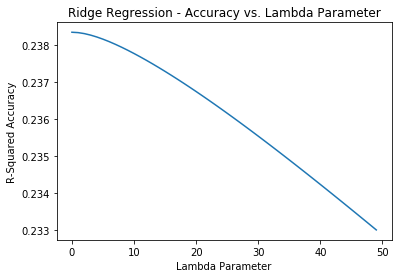

In [211]:
Y = german['lend']
alphas = np.arange(0,50)
lend_yesno=[]
for a in alphas:
    ridgereg = linear_model.Ridge(alpha=a)#, fit_intercept=0)
    ridgereg.fit(X_ridge, Y)
    lend_yesno.append(ridgereg.score(X_ridge, Y))   
plt.plot(alphas, lend_yesno)
plt.xlabel('Lambda Parameter')
plt.ylabel('R-Squared Accuracy')
plt.title('Ridge Regression - Accuracy vs. Lambda Parameter')

### LASSO Regression

C:\Users\fergu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


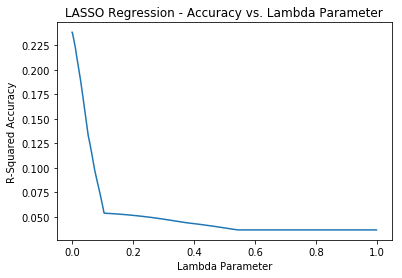

In [220]:
lend_yesno = []
alphas = np.arange(0,1, 0.001)
for a in alphas:
    lass = linear_model.Lasso(alpha=a)
    lass.fit(X_ridge, Y)
    lend_yesno.append(lass.score(X_ridge, Y))
plt.plot(alphas, lend_yesno)
plt.xlabel('Lambda Parameter')
plt.ylabel('R-Squared Accuracy')
plt.title('LASSO Regression - Accuracy vs. Lambda Parameter')